---
**License**

 NC_CCL_Bocquet_Test

 Tue Aug 24 10:30:00 2021\
 Copyright  2021\
 Cinthia Nunes de Lima <cinthia.n.lima@uel.br> \ Mariana Penna-Lima <pennalima@unb.br>

---
---

 NC_CCL_Bocquet_Test\
 Copyright (C) 2021 Cinthia Nunes de Lima <cinthia.n.lima@uel.br>, Mariana Penna-Lima <pennalima@unb.br>

 numcosmo is free software: you can redistribute it and/or modify it
 under the terms of the GNU General Public License as published by the
 Free Software Foundation, either version 3 of the License, or
 (at your option) any later version.

 numcosmo is distributed in the hope that it will be useful, but
 WITHOUT ANY WARRANTY; without even the implied warranty of
 MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.
 See the GNU General Public License for more details.

 You should have received a copy of the GNU General Public License along
 with this program.  If not, see <http://www.gnu.org/licenses/>.
 
---

In [1]:
# NumCosmo
from numcosmo_py import Nc, Ncm
from numcosmo_py.ccl.nc_ccl import create_nc_obj, CCLParams, dsigmaM_dlnM
from numcosmo_py.ccl.comparison import compare_ccl_nc_func

# CCL
import pyccl as ccl
from pyccl.halos.massdef import MassDef

import sys
import numpy as np
import math
import matplotlib.pyplot as plt

%matplotlib inline
import random

In [2]:
Omega_c = 0.262
Omega_b = 0.049
Omega_k = 0.0
H0 = 67.66
Tcmb0 = 2.7255
A_s = 2.1e-9
sigma8 = 0.8277
n_s = 0.96
Neff = 0.0
w0 = -1.0
wa = 0.0

In [3]:
# CCL Cosmology
ccl_cosmo = ccl.Cosmology(
    Omega_c=Omega_c,
    Omega_b=Omega_b,
    Neff=Neff,
    h=H0 / 100.0,
    sigma8=sigma8,
    n_s=n_s,
    Omega_k=Omega_k,
    w0=w0,
    wa=wa,
    T_CMB=Tcmb0,
    m_nu=[0.00, 0.0, 0.0],
    transfer_function="eisenstein_hu",
    matter_power_spectrum="linear",
)

Ncm.cfg_init()
Ncm.cfg_set_log_handler(lambda msg: sys.stdout.write(msg) and sys.stdout.flush())

# NumCosmo Cosmology
cosmology = create_nc_obj(ccl_cosmo)
cosmo = cosmology.cosmo
dist = cosmology.dist
psf = cosmology.psf

In [4]:
# CCL Bocquet multiplicity function

# Hydrodinamical- Mean - Delta: 200
ccl_mdef_B_H200m = MassDef(Delta=200, rho_type="matter")
ccl_H200m = ccl.halos.MassFuncBocquet16(mass_def=ccl_mdef_B_H200m, hydro=True)
# ccl_H200m = ccl.halos.MassFuncBocquet16(cosmo_ccl, mass_def=ccl_mdef_B_H200m, hydro=True)

# Hydrodinamical- Critical - Delta: 200
ccl_mdef_B_H200c = MassDef(Delta=200, rho_type="critical")
ccl_H200c = ccl.halos.MassFuncBocquet16(mass_def=ccl_mdef_B_H200c, hydro=True)


# Hydrodinamical- Critical - Delta: 500
ccl_mdef_B_H500c = MassDef(Delta=500, rho_type="critical")
ccl_H500c = ccl.halos.MassFuncBocquet16(mass_def=ccl_mdef_B_H500c, hydro=True)

# Dark Matter Only- Mean - Delta: 200
ccl_mdef_B_D200m = MassDef(Delta=200, rho_type="matter")
ccl_D200m = ccl.halos.MassFuncBocquet16(mass_def=ccl_mdef_B_D200m, hydro=False)

# Dark Matter Only- Critical - Delta: 200
ccl_mdef_B_D200c = MassDef(Delta=200, rho_type="critical")
ccl_D200c = ccl.halos.MassFuncBocquet16(mass_def=ccl_mdef_B_D200c, hydro=False)

# Dark Matter Only- Critical - Delta: 500
ccl_mdef_B_D500c = MassDef(Delta=500, rho_type="critical")
ccl_D500c = ccl.halos.MassFuncBocquet16(mass_def=ccl_mdef_B_D500c, hydro=False)

# NumCosmo Bocquet multiplicity function

# Hydrodinamical- Mean - Delta: 200
mulB_H200m = Nc.MultiplicityFuncBocquet.new()
mulB_H200m.set_mdef(Nc.MultiplicityFuncMassDef.MEAN)
mulB_H200m.set_Delta(200.0)
mulB_H200m.set_sim(Nc.MultiplicityFuncBocquetSim.HYDRO)

nc_H200m = Nc.HaloMassFunction.new(dist, psf, mulB_H200m)

# Hydrodinamical- Critical - Delta: 200
mulB_H200c = Nc.MultiplicityFuncBocquet.new()
mulB_H200c.set_mdef(Nc.MultiplicityFuncMassDef.CRITICAL)
mulB_H200c.set_Delta(200.0)
mulB_H200c.set_sim(Nc.MultiplicityFuncBocquetSim.HYDRO)

nc_H200c = Nc.HaloMassFunction.new(
    dist, psf, mulB_H200c
)  # anteriormente: psf ao inves de ps_lin

# Hydrodinamical- Critical - Delta: 500
mulB_H500c = Nc.MultiplicityFuncBocquet.new()
mulB_H500c.set_mdef(Nc.MultiplicityFuncMassDef.CRITICAL)
mulB_H500c.set_Delta(500.0)
mulB_H500c.set_sim(Nc.MultiplicityFuncBocquetSim.HYDRO)

nc_H500c = Nc.HaloMassFunction.new(dist, psf, mulB_H500c)

# Dark Matter Only- Mean - Delta: 200
mulB_D200m = Nc.MultiplicityFuncBocquet.new()
mulB_D200m.set_mdef(Nc.MultiplicityFuncMassDef.MEAN)
mulB_D200m.set_Delta(200.0)
mulB_D200m.set_sim(Nc.MultiplicityFuncBocquetSim.DM)

nc_D200m = Nc.HaloMassFunction.new(dist, psf, mulB_D200m)

# Dark Matter Only- Critical - Delta: 200
mulB_D200c = Nc.MultiplicityFuncBocquet.new()
mulB_D200c.set_mdef(Nc.MultiplicityFuncMassDef.CRITICAL)
mulB_D200c.set_Delta(200.0)
mulB_D200c.set_sim(Nc.MultiplicityFuncBocquetSim.DM)

nc_D200c = Nc.HaloMassFunction.new(dist, psf, mulB_D200c)

# Dark Matter Only- Critical - Delta: 500
mulB_D500c = Nc.MultiplicityFuncBocquet.new()
mulB_D500c.set_mdef(Nc.MultiplicityFuncMassDef.CRITICAL)
mulB_D500c.set_Delta(500.0)
mulB_D500c.set_sim(Nc.MultiplicityFuncBocquetSim.DM)

nc_D500c = Nc.HaloMassFunction.new(dist, psf, mulB_D500c)

In [5]:
# Array of masses
m_arr = np.geomspace(1e10, 1e15, 128)

# Array of redshifts
z_arr = np.linspace(0.0, 1.0, 16)

In [6]:
psf.prepare(cosmo)
sigma8_nc = psf.eval_sigma(0.0, 8.0 / 0.6766)

nc_H200m.set_eval_limits(cosmo, math.log(3e10), math.log(1e16), 0.0, 2.0)
nc_H200m.prepare(cosmo)

nc_H200c.set_eval_limits(cosmo, math.log(1e10), math.log(1e16), 0.0, 2.0)
nc_H200c.prepare(cosmo)

nc_H500c.set_eval_limits(cosmo, math.log(1e10), math.log(1e16), 0.0, 2.0)
nc_H500c.prepare(cosmo)

nc_D200m.set_eval_limits(cosmo, math.log(1e10), math.log(1e16), 0.0, 2.0)
nc_D200m.prepare(cosmo)

nc_D200c.set_eval_limits(cosmo, math.log(1e10), math.log(9e15), 0.0, 2.0)
nc_D200c.prepare(cosmo)

nc_D500c.set_eval_limits(cosmo, math.log(1e10), math.log(1e16), 0.0, 2.0)
nc_D500c.prepare(cosmo)

/tmp/ipykernel_588506/3462662178.py:4: Warning: value "24.124463" of type 'gdouble' is invalid or out of range for property 'lnMi' of type 'gdouble'
  nc_H200m.set_eval_limits(cosmo, math.log(3e10), math.log(1e16), 0.0, 2.0)
/tmp/ipykernel_588506/3462662178.py:7: Warning: value "23.025851" of type 'gdouble' is invalid or out of range for property 'lnMi' of type 'gdouble'
  nc_H200c.set_eval_limits(cosmo, math.log(1e10), math.log(1e16), 0.0, 2.0)
/tmp/ipykernel_588506/3462662178.py:10: Warning: value "23.025851" of type 'gdouble' is invalid or out of range for property 'lnMi' of type 'gdouble'
  nc_H500c.set_eval_limits(cosmo, math.log(1e10), math.log(1e16), 0.0, 2.0)
/tmp/ipykernel_588506/3462662178.py:13: Warning: value "23.025851" of type 'gdouble' is invalid or out of range for property 'lnMi' of type 'gdouble'
  nc_D200m.set_eval_limits(cosmo, math.log(1e10), math.log(1e16), 0.0, 2.0)
/tmp/ipykernel_588506/3462662178.py:16: Warning: value "23.025851" of type 'gdouble' is invalid or

In [7]:
def cmp_double(desc, m1, m2, x1, x2):
    print(
        "%s: %s = % 22.15g, %s = % 22.15g, CMP: %9.2e"
        % (desc, m1, x1, m2, x2, math.fabs(x1 / x2 - 1.0))
    )

<Figure size 640x480 with 0 Axes>

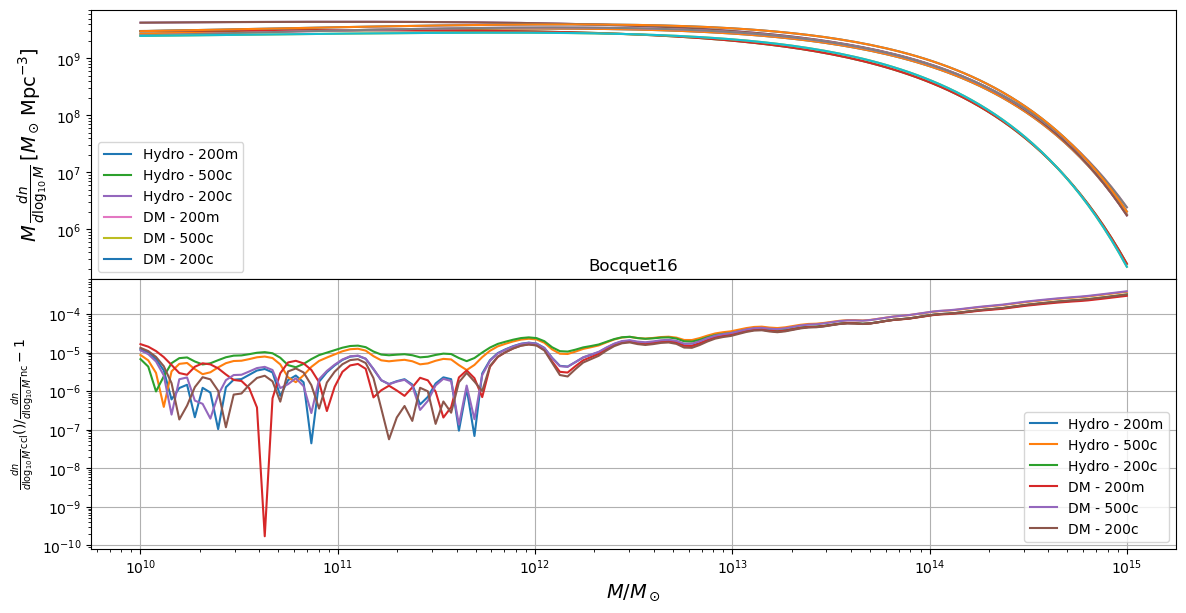

In [9]:
plt.figure()
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={"hspace": 0}, figsize=(14, 7))

multiplicity_functions = [
    (ccl_H200m, nc_H200m, "Hydro - 200m"),
    (ccl_H500c, nc_H500c, "Hydro - 500c"),
    (ccl_H200c, nc_H200c, "Hydro - 200c"),
    (ccl_D200m, nc_D200m, "DM - 200m"),
    (ccl_D500c, nc_D500c, "DM - 500c"),
    (ccl_D200c, nc_D200c, "DM - 200c"),
]

z = 1.2
a = 1.0 / (1.0 + z)

# CCL
for ccl_mf_obj, nc_mf_obj, mf_obj_name in multiplicity_functions:
    # ccl_sigmaM = ccl.sigmaM(ccl_cosmo, m_arr, 1.0)
    # ccl_mf = ccl_mf_obj._get_fsigma(ccl_cosmo, ccl_sigmaM, 1.0, np.log(m_arr))
    ccl_mf = ccl_mf_obj(ccl_cosmo, m_arr, a)
    ccl_nm = m_arr * ccl_mf

    axs[0].plot(m_arr, ccl_nm, label=mf_obj_name)

    # NumCosmo
    nc_mf = [
        nc_mf_obj.dn_dlnM(cosmo, logm, z) * math.log(10.0) for logm in np.log(m_arr)
    ]
    nc_nm = m_arr * nc_mf

    axs[0].plot(m_arr, nc_nm)
    axs[1].plot(m_arr, np.abs(ccl_nm / nc_nm - 1.0), "-", label=mf_obj_name)

# Plot settings

axs[0].set_xscale("log")
axs[0].set_yscale("log")
# axs[0].ylim([1.0E9,8.5E9])
axs[1].set_yscale("log")
axs[1].set_xlabel(r"$M/M_\odot$", fontsize=14)
axs[0].set_ylabel(
    r"$M\,\frac{dn}{d\log_{10}M}\,[M_\odot\,{\rm Mpc}^{-3}]$", fontsize=14
)
axs[1].set_ylabel(
    r"$\frac{dn}{d\log_{10}M}_{\mathrm{ccl}} () / \frac{dn}{d\log_{10}M}_{\mathrm{nc}} - 1$"
)
axs[0].legend(loc="best")

axs[1].legend(loc="best")
axs[1].grid()

plt.title("Bocquet16")
plt.show()

In [ ]:
%timeit ccl_mf

In [ ]:
%timeit ccl_nm

In [ ]:
%timeit nc_mf

In [ ]:
%timeit nc_nm